In [0]:
dec_hidden_state = [5,1,20]

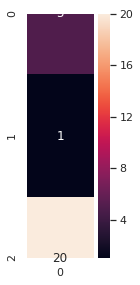

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;  sns.set()


plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)), annot = True)

In [0]:
annotation = [3, 12, 45]

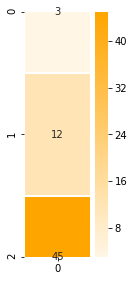

In [0]:

# Let's visualize the single annotation
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(annotation)), annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [0]:
annotations = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])

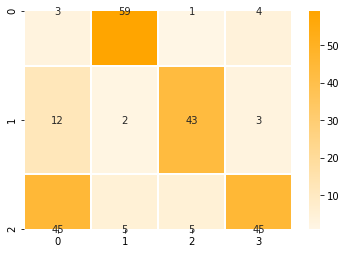

In [0]:

# Let's visualize our annotation (each column is an annotation)
ax = sns.heatmap(annotations, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [0]:
def dot_attention_score(dec_hidden_state, annotations):
  return np.matmul(np.transpose(dec_hidden_state), annotations)

attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)
attention_weights_raw

array([927., 397., 148., 929.])

In [0]:
def softmax(x):
  x = np.array(x, dtype = np.float128)
  e_x = np.exp(x)
  return e_x / e_x.sum(axis = 0)

attention_weights = softmax(attention_weights_raw)
print(attention_weights)

[1.19202922e-001 7.94715151e-232 5.76614420e-340 8.80797078e-001]


In [0]:
def apply_attention_score(attention_weights, annotations):
  return attention_weights * annotations


applied_attention = apply_attention_score(attention_weights, annotations)
applied_attention

array([[3.57608766e-001, 4.68881939e-230, 5.76614420e-340,
        3.52318831e+000],
       [1.43043506e+000, 1.58943030e-231, 2.47944200e-338,
        2.64239123e+000],
       [5.36413149e+000, 3.97357575e-231, 2.88307210e-339,
        3.99001076e+001]], dtype=float128)

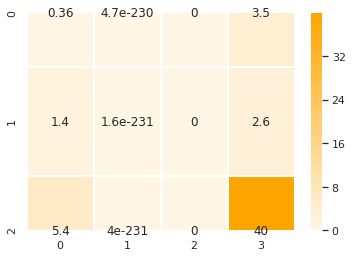

In [0]:
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [0]:
def calculate_attention_vector(applied_attention):
  return np.sum(applied_attention, axis=1)

attention_vector = calculate_attention_vector(applied_attention)
attention_vector

array([ 3.88079708,  4.0728263 , 45.26423912], dtype=float128)

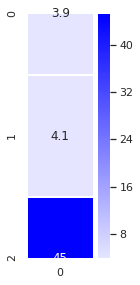

In [0]:
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)